In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('input/train.csv')
df = df.drop(columns=["id", "parent_id", "publication_id", "article_id", "created_date", "identity_annotator_count", "toxicity_annotator_count"])
out_of_competition_traits = ["severe_toxicity", "obscene", "identity_attack", "insult", "threat", "sexual_explicit"]

df

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,psychiatric_or_mental_illness,transgender,white,rating,funny,wow,sad,likes,disagree,sexual_explicit
0,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,rejected,0,0,0,0,0,0.0
1,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,rejected,0,0,0,0,0,0.0
2,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,rejected,0,0,0,0,0,0.0
3,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,rejected,0,0,0,0,0,0.0
4,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,rejected,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,approved,0,0,0,0,0,0.0
1804870,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,approved,0,0,0,0,0,0.0
1804871,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,approved,0,0,0,0,0,0.0
1804872,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,approved,0,0,0,0,0,0.0


In [3]:
import IPython.display as ipd

ipd.display(ipd.Markdown(f"""# Overview of datatypes:"""))
      
df.info()

# Overview of datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   target                               float64
 1   comment_text                         object 
 2   severe_toxicity                      float64
 3   obscene                              float64
 4   identity_attack                      float64
 5   insult                               float64
 6   threat                               float64
 7   asian                                float64
 8   atheist                              float64
 9   bisexual                             float64
 10  black                                float64
 11  buddhist                             float64
 12  christian                            float64
 13  female                               float64
 14  heterosexual                         float64
 15  hindu                           

In [4]:
ipd.display(ipd.Markdown(f"""# Value distribution for each column:"""))

df.describe()

# Value distribution for each column:

,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,...,physical_disability,psychiatric_or_mental_illness,transgender,white,funny,wow,sad,likes,disagree,sexual_explicit
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,...,405130.000000,405130.000000,405130.000000,405130.00000,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,0.034393,...,0.001356,0.012083,0.006724,0.05695,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03
std,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,0.167900,...,0.017505,0.089183,0.069027,0.21596,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00


In [5]:
df.describe().loc["mean"]

target                                 0.103017
severe_toxicity                        0.004582
obscene                                0.013877
identity_attack                        0.022636
insult                                 0.081153
threat                                 0.009311
asian                                  0.011964
atheist                                0.003205
bisexual                               0.001884
black                                  0.034393
buddhist                               0.001410
christian                              0.095268
female                                 0.127670
heterosexual                           0.003237
hindu                                  0.001457
homosexual_gay_or_lesbian              0.025611
intellectual_or_learning_disability    0.001088
jewish                                 0.017863
latino                                 0.006127
male                                   0.108687
muslim                                 0

# Pairwise correlations between features

/tmp/ipykernel_930480/3024323954.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


<Axes: >

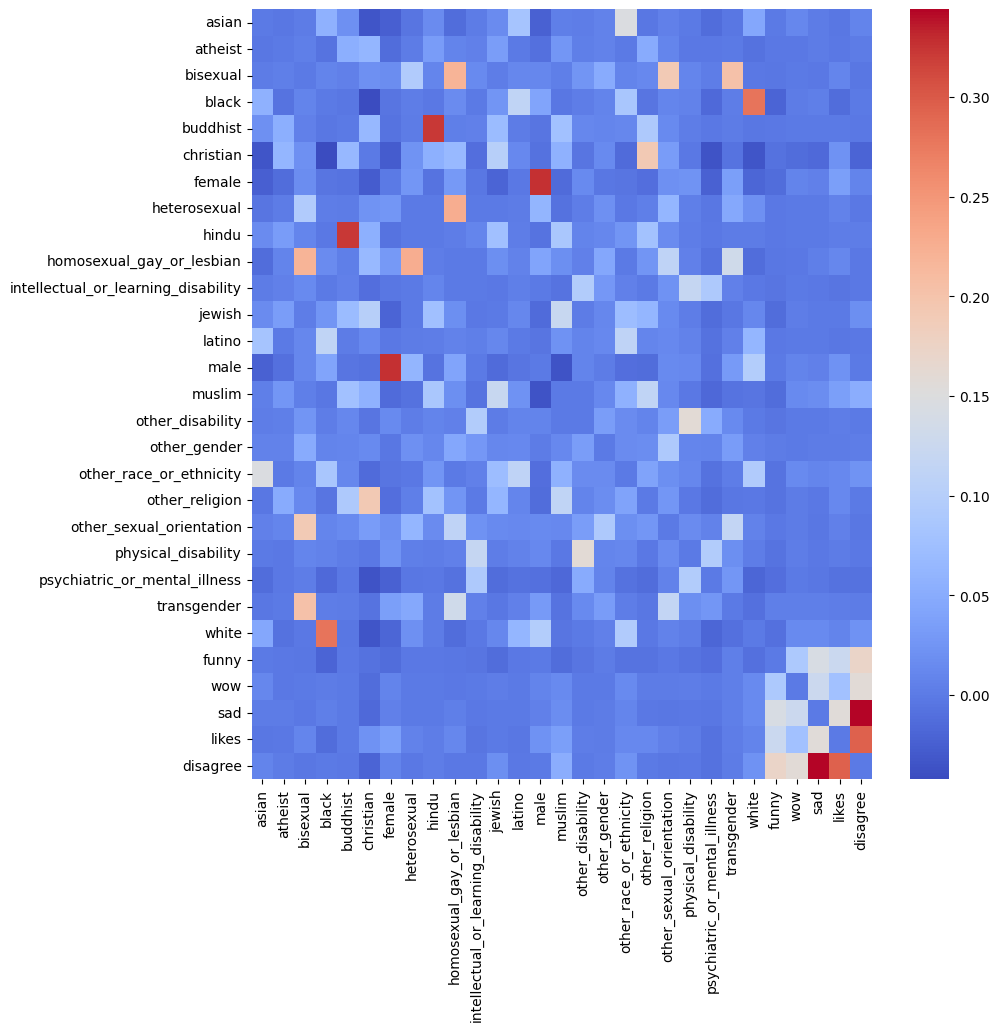

In [6]:
ipd.display(ipd.Markdown(f"""# Pairwise correlations between features"""))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

corr_df = df.corr()
corr_df = corr_df.drop("target")
corr_df = corr_df.drop(columns=["target"])
corr_df = corr_df.drop(columns=out_of_competition_traits)
for i in out_of_competition_traits:
    corr_df = corr_df.drop(i)

# remove diagonal values to make plot more readable
for column in corr_df.columns:
    corr_df.loc[column, column] = 0


sns.heatmap(corr_df, cmap='coolwarm')

# Distribution of string lengths

<Axes: >

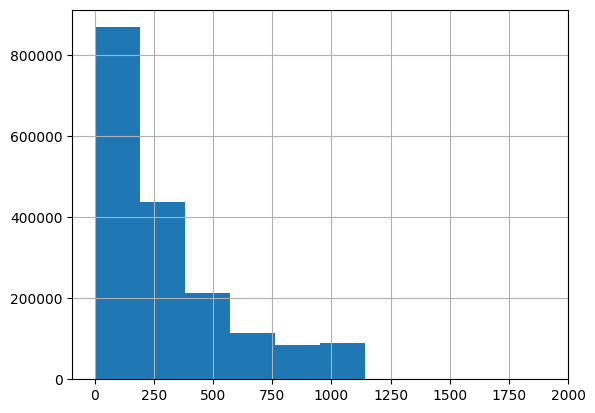

In [7]:
ipd.display(ipd.Markdown(f"""# Distribution of string lengths"""))

df["text_len"] = df["comment_text"].str.len()
df["text_len"].hist()

In [8]:
# filter columns that are float:
risk_traits = df.select_dtypes(include=['float64']).columns

risk_traits = risk_traits.drop(out_of_competition_traits)
risk_traits

percent = (df[df["target"] > 0.5].shape[0] / df.shape[0]) * 100
percent



5.8972537695152125

# Percentage of target>0.5 among additional features

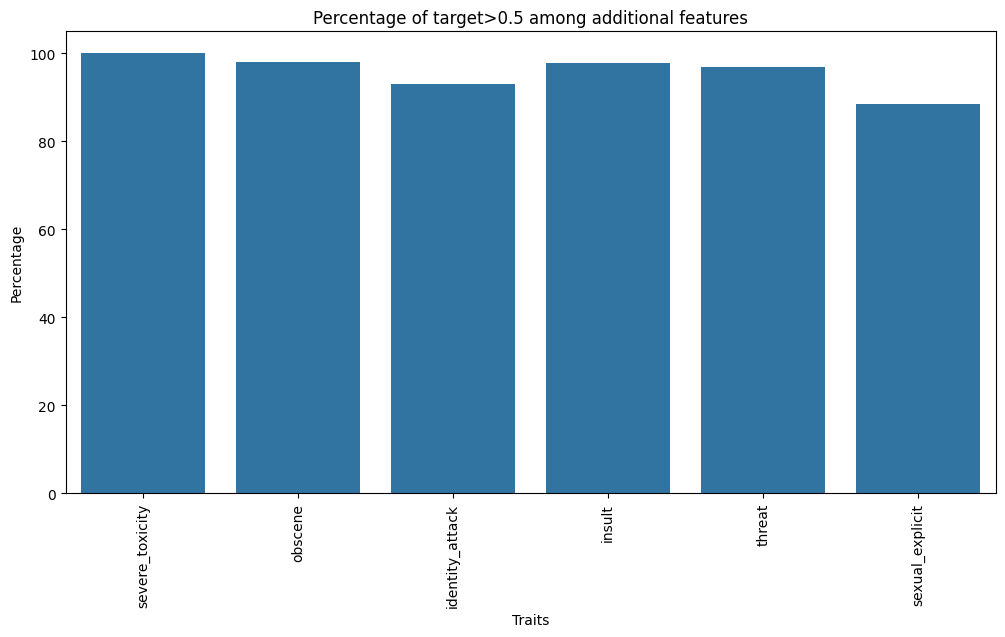

In [9]:
ipd.display(ipd.Markdown(f"""# Percentage of target>0.5 among additional features"""))


percents = []
for trait in out_of_competition_traits:
    # Filter the dataframe based on the condition where some other features are each >0.5
    filtered_df = df[df[trait] > 0.5]
    # Compute the percent of target>0.5 among the filtered categories
    percent = (filtered_df[filtered_df['target'] > 0.5].shape[0] / filtered_df.shape[0]) * 100
    percents.append(percent)


plt.figure(figsize=(12, 6))
sns.barplot(x=out_of_competition_traits, y=percents)
plt.xlabel('Traits')
plt.ylabel('Percentage')
plt.title('Percentage of target>0.5 among additional features')
plt.xticks(rotation=90)
plt.show()


# Percentage of target>0.5 among identity traits

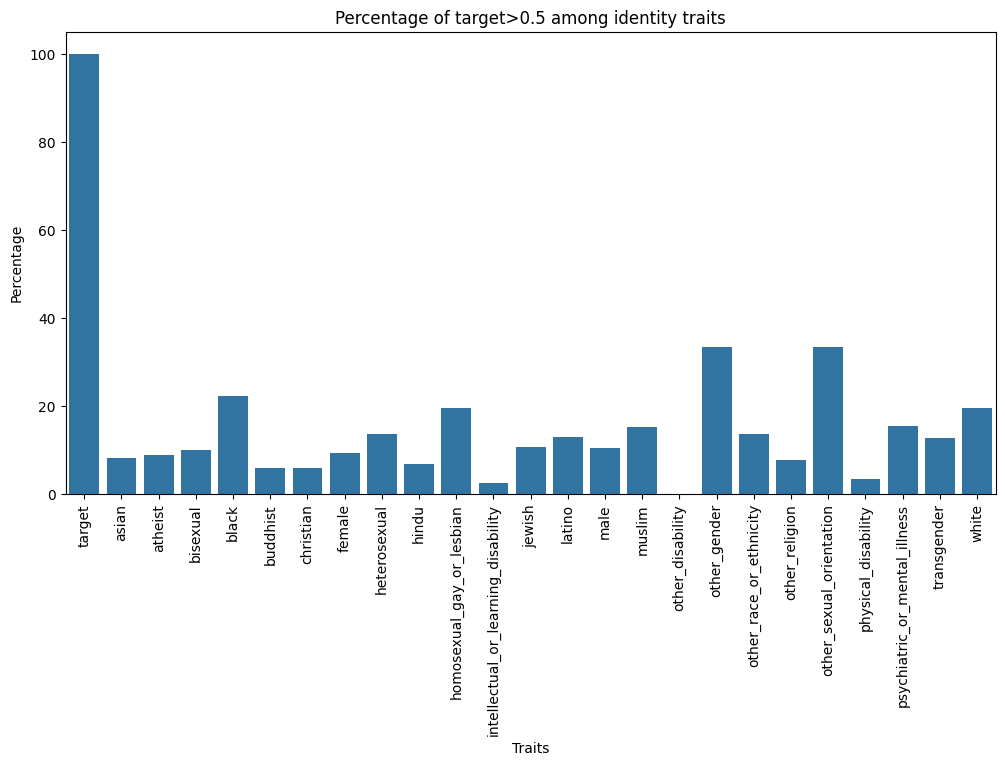

In [10]:
ipd.display(ipd.Markdown(f"""# Percentage of target>0.5 among identity traits"""))

percents = []
for trait in risk_traits:
    # Filter the dataframe based on the condition where some other features are each >0.5
    filtered_df = df[df[trait] > 0.5]
    # Compute the percent of target>0.5 among the filtered categories
    percent = (filtered_df[filtered_df['target'] > 0.5].shape[0] / filtered_df.shape[0]) * 100
    percents.append(percent)

percents


plt.figure(figsize=(12, 6))
sns.barplot(x=risk_traits, y=percents)
plt.xlabel('Traits')
plt.ylabel('Percentage')
plt.title('Percentage of target>0.5 among identity traits')
plt.xticks(rotation=90)

plt.show()

# Distribution of Toxicity Variable

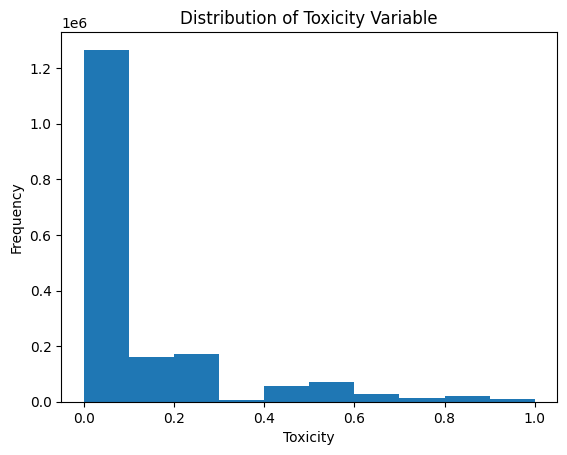

In [11]:
ipd.display(ipd.Markdown(f"""# Distribution of Toxicity Variable"""))

plt.hist(df['target'], bins=10)
plt.xlabel('Toxicity')
plt.ylabel('Frequency')
plt.title('Distribution of Toxicity Variable')
plt.show()

In [12]:
risk_all = risk_traits
risk_gender = ['male', 'female', 'transgender', 'other_gender']
risk_sexual_orientation = ['heterosexual', 'homosexual_gay_or_lesbian', 'other_sexual_orientation']
risk_religion = [
    'christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion'
                  ]
risk_disability = ['physical_disability', 'intellectual_or_learning_disability', 'psychiatric_or_mental_illness', 'other_disability']

for risk in [risk_gender, risk_sexual_orientation, risk_religion, risk_disability]:
    for el in risk:
        assert el in risk_all, f"{el} not"


In [13]:
risks = {
    # "Disability" : risk_disability,
    # "Gender" : risk_gender,
    # "Sexual Orientation" : risk_sexual_orientation,
    "Religion" : risk_religion
}

# Frequency of specific categories

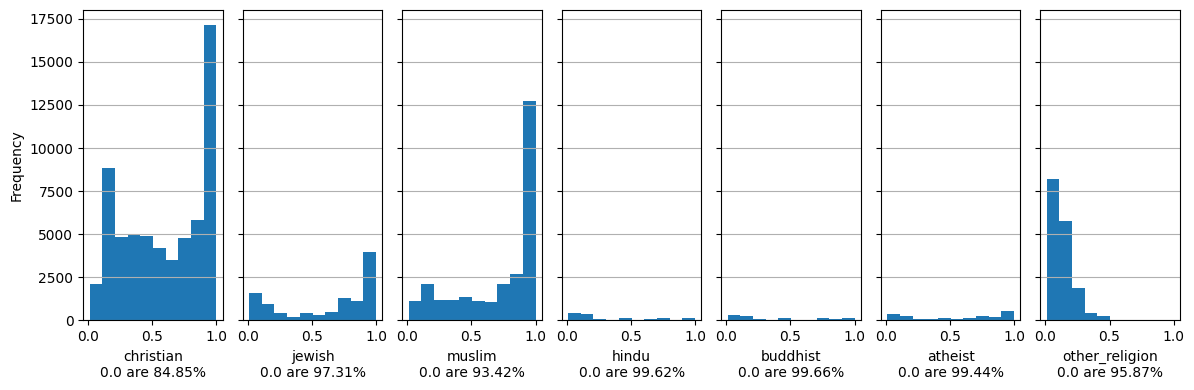

In [14]:
ipd.display(ipd.Markdown(f"""# Frequency of specific categories"""))

import numpy as np
for risk, traits in risks.items():
    num_cols = len(traits)
    num_rows = 1

    # Create a figure and axes for the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4), sharey=True)

    # Make sure axes is an array even if there's only one plot
    axes = np.array(axes).flatten()

    # Iterate over the traits and create a histogram for each
    for i, trait in enumerate(traits):
        zeros_are = df[trait].value_counts(normalize=True).get(0, 0) * 100
        axes[i].hist(df[trait], bins=10, range=(0.01, 1))
        axes[i].set_xlabel(f"{trait}\n0.0 are {zeros_are:.2f}%")
        if i == 0:  # Set the ylabel only for the first subplot
            axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Add an overall title above all subplots if desired
    # fig.suptitle('Your Title Here', fontsize=16)

    # Show the plot
    plt.show()
    # break  # Only plots the first set of traits; remove if you want to plot for all risks
